# Lab: Análise Exploratória de Dados
---

**Feito por**: Fabricio Zillig (RM 10241726)

Acesse os dados do FOSP em https://drive.google.com/file/d/1C5q8GSamLzTpB9ck695QRfSMtOWR3cNj/view?usp=sharing (sugestão, empregue o gdown). O dicionário de dados você pode encontrar na pasta da Aula_03.

Em grupo (max 4 alunos) explore os dados e defina que explorações de dados que você construiria neste caso. É um exercício de concepção, e neste momento você não precisa implementar.

Faça uma exploração de dados de interesse com quaisquer ferramentas que julgar útil

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile

Carregado os dados

In [5]:
with zipfile.ZipFile("data/fosp.zip", "r") as zip_ref:
    with zip_ref.open("pacigeral_12_23.csv") as csv_file:
        df = pd.read_csv(csv_file, delimiter=",", low_memory=False)

## Visão geral dos dados

In [7]:
# Exibir as primeiras linhas do DataFrame
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,4,17,2,SP,SP,3538709,PIRACICABA,9,2011-06-21,24,...,NaN,NaN,3538709,80003,NEOPLASIA MALIGNA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Piracicaba
1,9,1,2,SP,SP,3535507,PARAGUACU PAULISTA,9,2005-02-25,3,...,NaN,NaN,3506003,80003,NEOPLASIA MALIGNA,14,Inativo,6,5,Bauru
2,9,18,2,SP,SP,3548500,SANTOS,9,2012-05-14,24,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos
3,5,19,1,RR,SP,3548500,SANTOS,1,2017-08-10,31,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos
4,4,16,1,SP,SP,3548500,SANTOS,2,2020-04-17,31,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos


In [9]:
# Exibir as informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178688 entries, 0 to 1178687
Data columns (total 100 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ESCOLARI    1178688 non-null  int64  
 1   IDADE       1178688 non-null  int64  
 2   SEXO        1178688 non-null  int64  
 3   UFNASC      1178688 non-null  object 
 4   UFRESID     1178688 non-null  object 
 5   IBGE        1178688 non-null  int64  
 6   CIDADE      1178688 non-null  object 
 7   CATEATEND   1178688 non-null  int64  
 8   DTCONSULT   1178688 non-null  object 
 9   CLINICA     1178688 non-null  int64  
 10  DIAGPREV    1178688 non-null  int64  
 11  DTDIAG      1178688 non-null  object 
 12  BASEDIAG    1178688 non-null  int64  
 13  TOPO        1178688 non-null  object 
 14  TOPOGRUP    1178688 non-null  object 
 15  DESCTOPO    1178688 non-null  object 
 16  MORFO       1178688 non-null  int64  
 17  DESCMORFO   1178684 non-null  object 
 18  EC          1178688 n

## 2. Hipóteses

- Existe uma diferença significativa na incidência de câncer entre homens e mulheres?
- Como a idade média de diagnóstico varia entre diferentes tipos de câncer?
- Existem padrões geográficos na distribuição dos casos de câncer no estado de São Paulo?
- Como a prevalência dos diferentes tipos de câncer mudou ao longo do tempo?
- O tempo entre o diagnóstico e o início do tratamento varia significativamente entre diferentes tipos de câncer?
- Como a idade média de diagnóstico de câncer mudou ao longo do tempo?
- Houve um aumento na proporção de casos diagnosticados em estágios precoces ao longo do tempo?
- Quais são as taxas de recorrência para diferentes tipos de câncer?

## 3. Exploração Inicial

Explorando a demografia dos dados

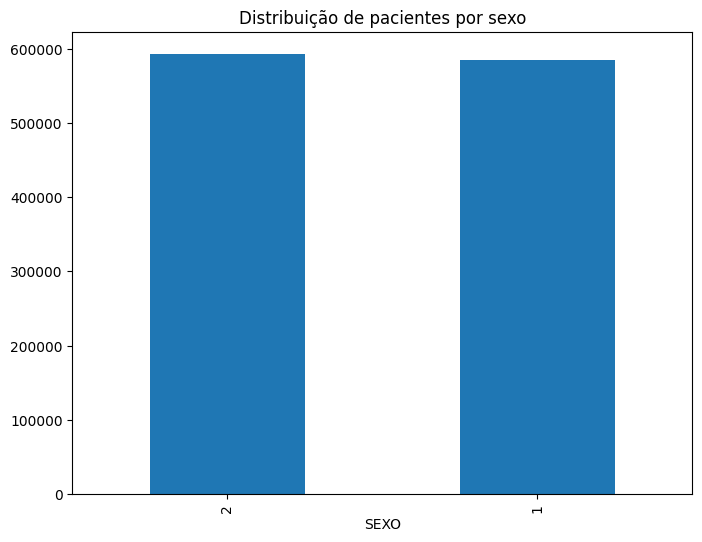

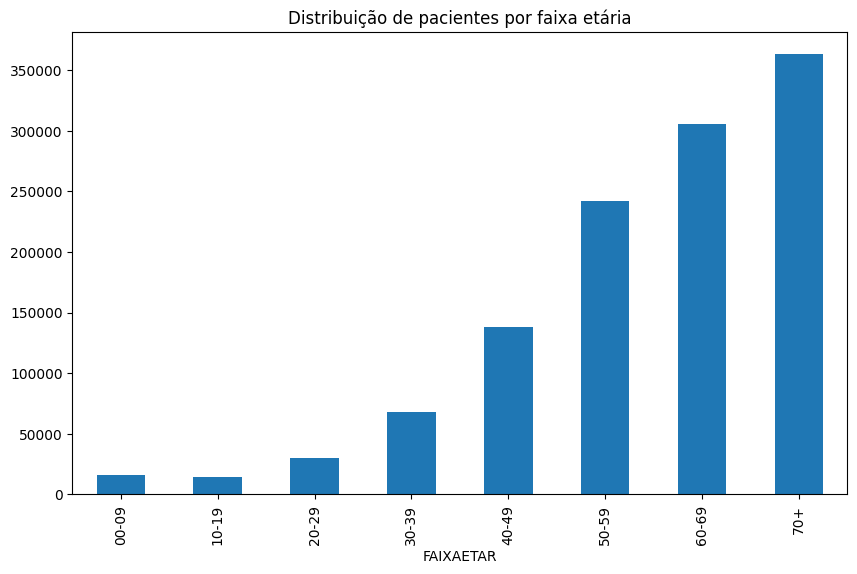

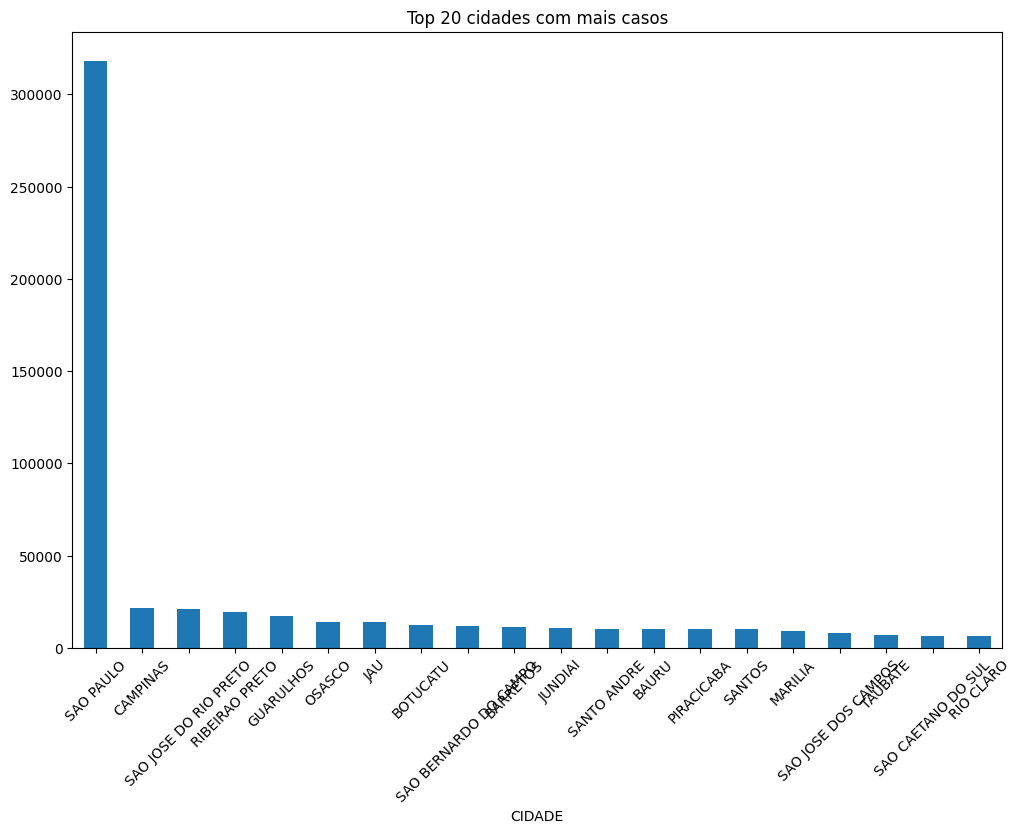

In [11]:
# Distribuição por sexo
plt.figure(figsize=(8, 6))
df["SEXO"].value_counts().plot(kind="bar")
plt.title("Distribuição de pacientes por sexo")
plt.show()

# Distribuição por faixa etária
plt.figure(figsize=(10, 6))
df["FAIXAETAR"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribuição de pacientes por faixa etária")
plt.show()

# Distribuição geográfica
plt.figure(figsize=(12, 8))
df["CIDADE"].value_counts().head(20).plot(kind="bar")
plt.title("Top 20 cidades com mais casos")
plt.xticks(rotation=45)
plt.show()


Explorando os tipos de cancer

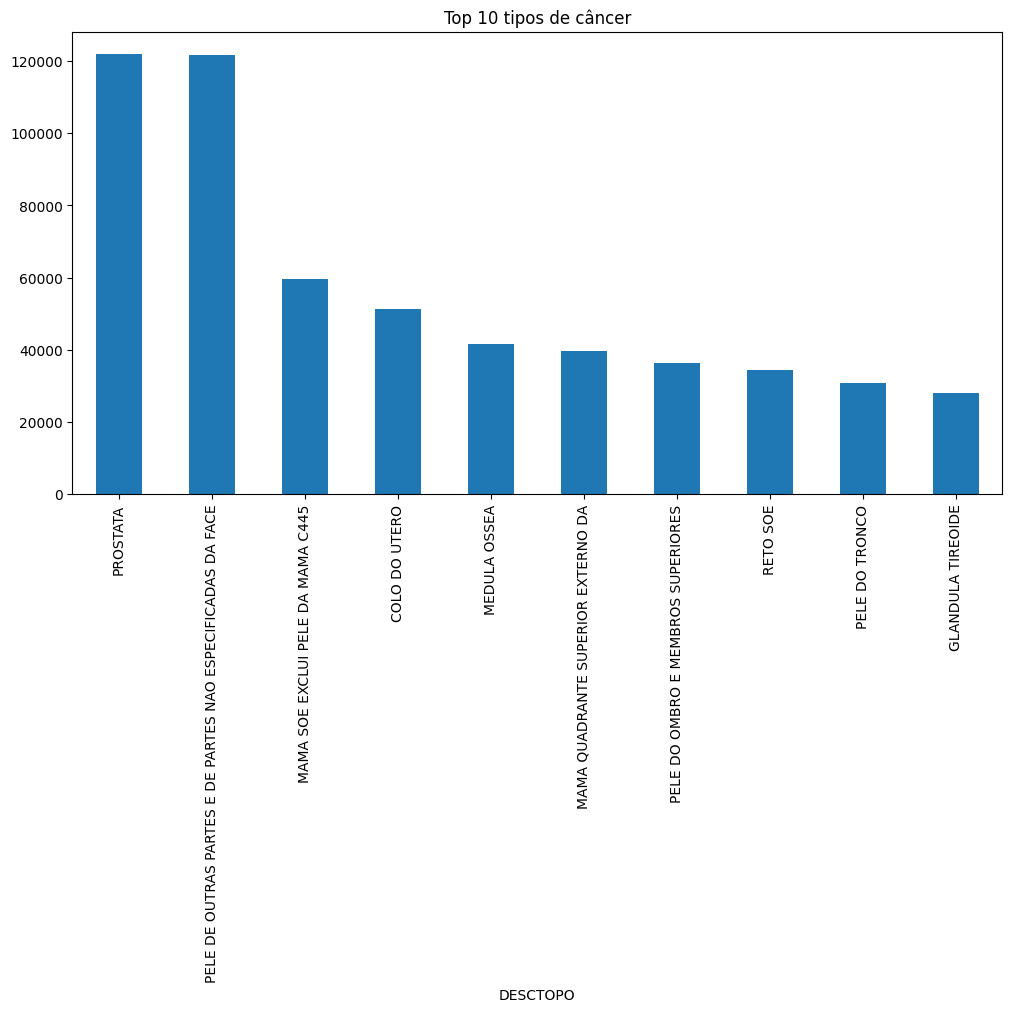

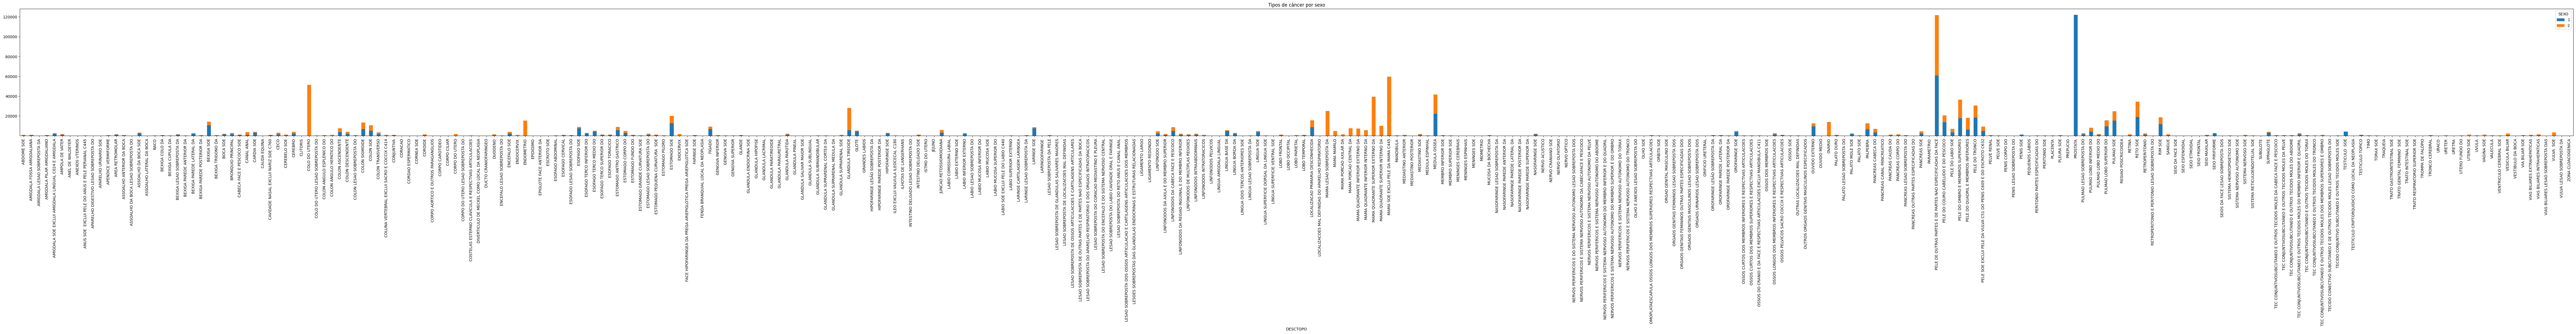

In [14]:
# Top 10 tipos de câncer
plt.figure(figsize=(12, 6))
df["DESCTOPO"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 tipos de câncer")
plt.xticks(rotation=90)
plt.show()

# Relação entre tipo de câncer e sexo
cancer_by_sex = pd.crosstab(df["DESCTOPO"], df["SEXO"])
cancer_by_sex.plot(kind="bar", stacked=True, figsize=(120, 6))
plt.title("Tipos de câncer por sexo")
plt.xticks(rotation=90)
plt.show()

Verificando número de casos e tratamentos

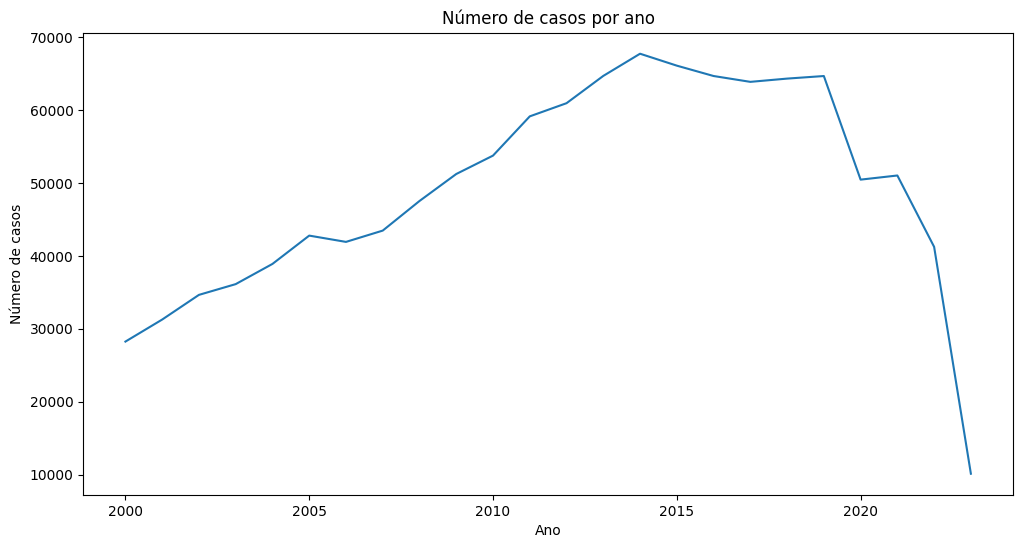

In [15]:
# Tendência de casos ao longo do tempo
df["ANODIAG"] = pd.to_datetime(df["DTDIAG"]).dt.year
cases_by_year = df["ANODIAG"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
cases_by_year.plot(kind="line")
plt.title("Número de casos por ano")
plt.xlabel("Ano")
plt.ylabel("Número de casos")
plt.show()

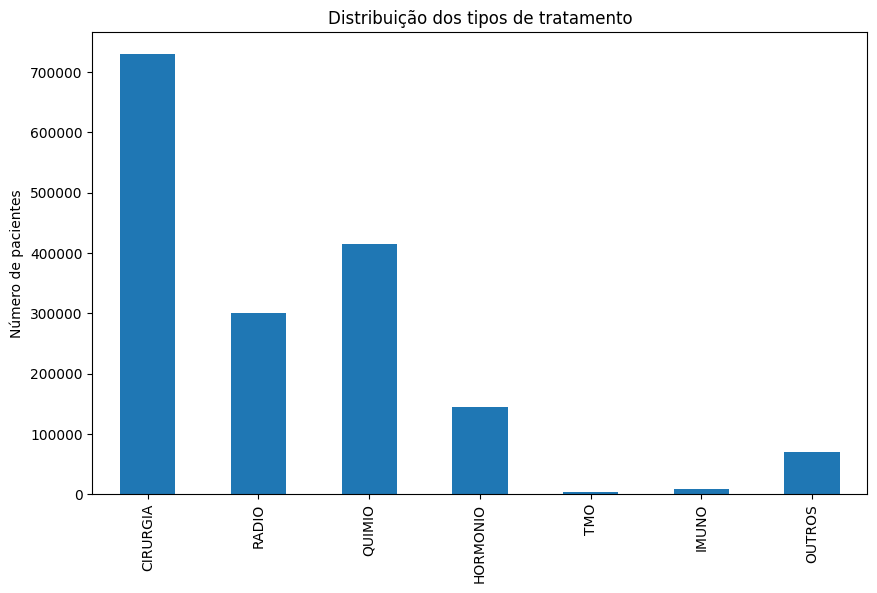

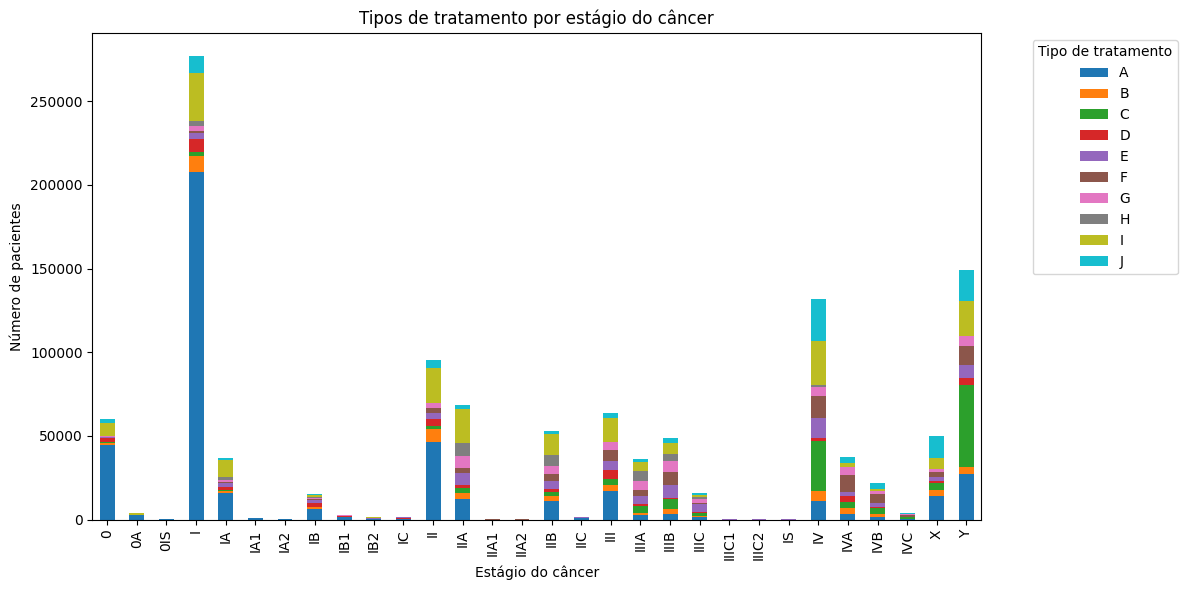

In [16]:
# Distribuição dos tipos de tratamento
treatment_cols = ["CIRURGIA", "RADIO", "QUIMIO", "HORMONIO", "TMO", "IMUNO", "OUTROS"]
treatment_data = df[treatment_cols].sum()
plt.figure(figsize=(10, 6))
treatment_data.plot(kind="bar")
plt.title("Distribuição dos tipos de tratamento")
plt.ylabel("Número de pacientes")
plt.show()

# Relação entre estágio do câncer e tipo de tratamento
stage_treatment = pd.crosstab(df["EC"], df["TRATAMENTO"])
stage_treatment.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Tipos de tratamento por estágio do câncer")
plt.xlabel("Estágio do câncer")
plt.ylabel("Número de pacientes")
plt.legend(title="Tipo de tratamento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
